# Question 1

![Image](q1-d1.png)
![Image](q1-d2.png)
![Image](q1-1.png)

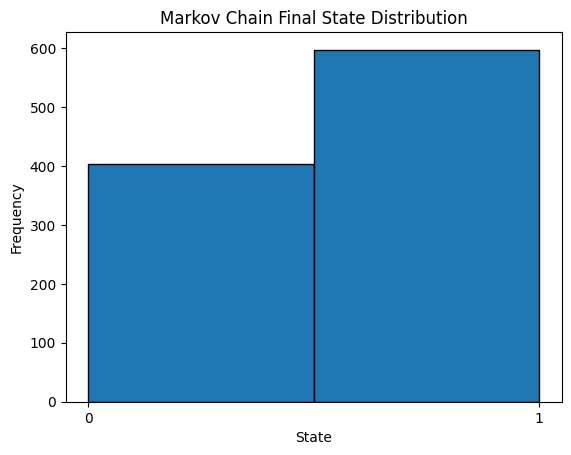

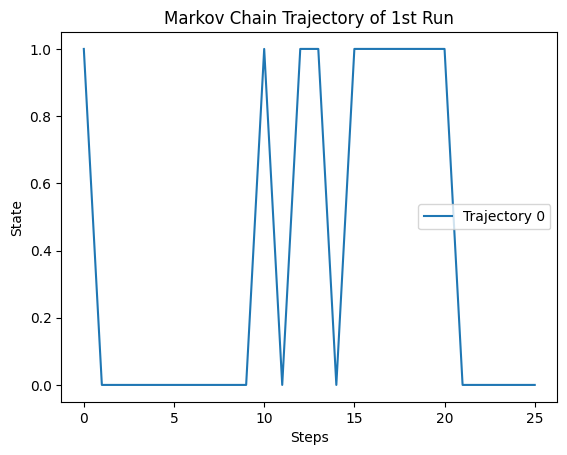

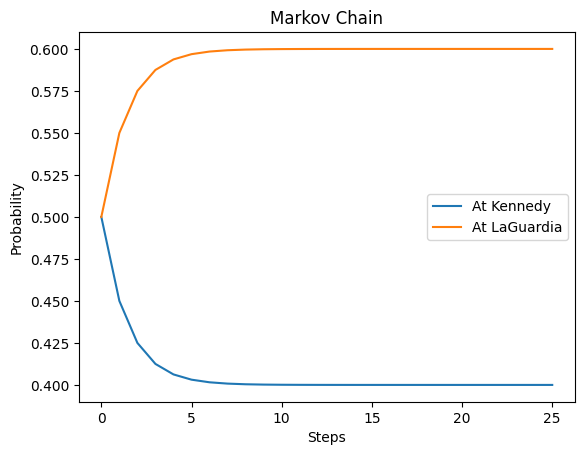

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T_matrix = np.array([[0.7, 0.3],
                     [0.2, 0.8]])

initial_states_prob = np.array([0.5, 0.5])

# for plotting

steps = 25

num_trajectories = 1000

final_states = np.zeros((num_trajectories))

final_trajectories = np.zeros((num_trajectories, steps+1))


for i in range(num_trajectories):
    current_state = np.random.choice([0, 1], p=initial_states_prob)
    final_trajectories[i][0] = current_state

    for j in range(steps):
        current_state = np.random.choice([0, 1], p=T_matrix[current_state])
        final_trajectories[i][j+1] = current_state
    
    final_states[i] = current_state

plt.hist(final_states, bins=2, edgecolor='black')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Markov Chain Final State Distribution')
plt.xticks([0, 1])
plt.show()

plt.plot(final_trajectories[0].T)
plt.xlabel('Steps')
plt.ylabel('State')
plt.title('Markov Chain Trajectory of 1st Run')
plt.legend(['Trajectory ' + str(i) for i in range(num_trajectories)])
plt.show()


current_state = initial_states_prob
array_of_states = np.zeros((steps+1, 2))
array_of_states[0] = current_state

for i in range(steps):
    current_state = np.dot(current_state, T_matrix)
    array_of_states[i+1] = current_state

plt.plot(array_of_states)
plt.xlabel('Steps')
plt.ylabel('Probability')
plt.title('Markov Chain')
plt.legend(['At Kennedy', 'At LaGuardia'])
plt.show()

# doing some 


![Image](q1-2.png)

In [2]:
print('After 25 steps, the probability of being at Kennedy is', array_of_states[steps, 0])
print('After 25 steps, the probability of being at LaGuardia is', array_of_states[steps, 1])
print()
print('Therefore, the probability of being at Kennedy is approximately', array_of_states[steps, 0], '\nand the probability of being at LaGuardia is approximately', array_of_states[steps, 1],)

After 25 steps, the probability of being at Kennedy is 0.4000000029802321
After 25 steps, the probability of being at LaGuardia is 0.5999999970197676

Therefore, the probability of being at Kennedy is approximately 0.4000000029802321 
and the probability of being at LaGuardia is approximately 0.5999999970197676


![Image](q1-3.png)
![Image](q1-d1.png)
![Image](q1-d2.png)

![Image](q1-3-written.png)

![Image](q1-4.png)

In [3]:
T = np.array([[0.7, 0.3],
              [0.2, 0.8]])

initial_state = np.array([0.5, 0.5])

# one week probability at LaGuardia
one_week = np.dot(initial_state, T)
print('\nAfter one week, the probability of being at LaGuardia is', one_week[1])

# two weeks probability at LaGuardia
two_weeks = np.dot(initial_state, np.linalg.matrix_power(T, 2))
print('\nAfter two weeks, the probability of being at LaGuardia is', two_weeks[1])

# long run probability at LaGuardia

# solving for a, aT = a
eigenvalues, eigenvectors = np.linalg.eig(T.T)

#print("Eigenvalues:", eigenvalues, "\nEigenvectors:", eigenvectors)

relevant_eigenvalue_index = np.where(np.isclose(eigenvalues, 1))[0][0]
left_eigenvector = eigenvectors[:, relevant_eigenvalue_index].real

#print("Left Eigenvector:", left_eigenvector)

# normalizing the left eigenvector
left_eigenvector /= left_eigenvector.sum()

print("\nNormalized Left Eigenvector:", left_eigenvector)
print("The long run probability of being at LaGuardia is", left_eigenvector[1])




After one week, the probability of being at LaGuardia is 0.55

After two weeks, the probability of being at LaGuardia is 0.5750000000000001

Normalized Left Eigenvector: [0.4 0.6]
The long run probability of being at LaGuardia is 0.6


![Image](q2-1.png)
![Image](q2-d.png)
![Image](q2-1-written.png)

![Image](q2-2.png)

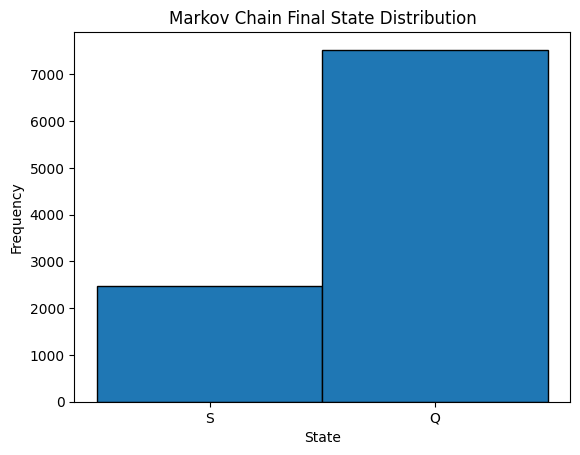

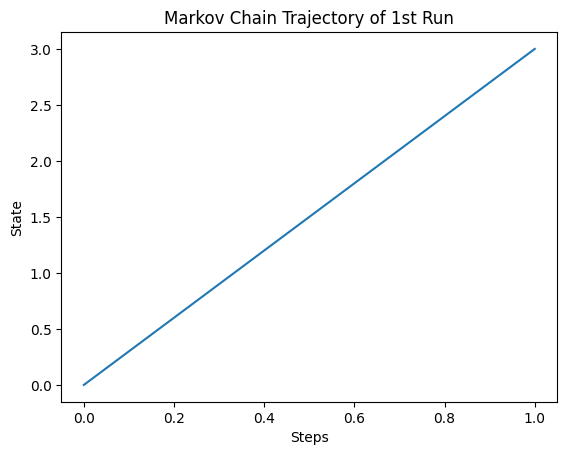

In [26]:
T = np.array([
    #[R   T     S     Q]
    [0.2, 0.60, 0.00, 0.2], # R
    [0.0, 0.55, 0.15, 0.3], # T
    [0.0, 0.00, 1.00, 0.0], # S <- absorbing state
    [0.0, 0.00, 0.00, 1.0]  # Q <- absorbing state
])

def single_trajectory(initial_state, T):
    trajectory = []

    # current_state, R = 0, T = 1, S = 2, Q = 3
    current_state = initial_state
    trajectory.append(current_state)

    while current_state not in [2, 3]: # while not in an absorbing state

        # choose next state based on random choice from transition matrix
        current_state = np.random.choice([0, 1, 2, 3], p=T[current_state])
        trajectory.append(current_state)
    
    return trajectory, trajectory[-1]

initial_state = 0 # = R
num_trajectories = 10000
final_states = np.zeros((num_trajectories))
final_trajectory_lengths = np.zeros((num_trajectories))
trajectories = []


for i in range(num_trajectories):
    trajectory, final_state = single_trajectory(initial_state, T)
    final_states[i] = final_state
    final_trajectory_lengths[i] = len(trajectory)
    trajectories.append(trajectory)


plt.hist(final_states, bins=2, edgecolor='black')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Markov Chain Final State Distribution')
# Add labels to the bins
plt.xticks([2.25, 2.75], ['S', 'Q'])
plt.show()

# showing the first trajectory
plt.plot(trajectories[0])
plt.xlabel('Steps')
plt.ylabel('State')
plt.title('Markov Chain Trajectory of 1st Run')
plt.show()

![Image](q2-3.png)

In [30]:
print("------ Empirical Estimates of Probability and Average Length of Trajectories ------")

# probability estimates
print('\nThe probability of ending up in state S is', np.mean(final_states == 2))
print('The probability of ending up in state Q is', np.mean(final_states == 3))

# average length of trajectories
print('\nThe average length of the trajectories is', np.mean(final_trajectory_lengths) - 1) # subtract 1 because the initial state is included in the trajectory

------ Empirical Estimates of Probability and Average Length of Trajectories ------

The probability of ending up in state S is 0.2474
The probability of ending up in state Q is 0.7526

The average length of the trajectories is 2.9458


![Image](q3-1.png)

![Image](q3-1-written.png)

![Image](q3-2.png)

In [54]:

T = np.zeros((23, 23)) 
# print(T[23])
# print(T)

for i in range(22):
    T[i, i+1] = 1
    T[i+1, i] = 1

T[22, 0] = 1
T[0, 22] = 1

T = T/2

# print(T)

uniform_initial_state = np.ones(23) / 23

# checking if aT = a

aT = np.dot(uniform_initial_state, T)

print("\nUniform Initial State:", uniform_initial_state)
print("\naT:", aT)
print("\nTherefore, aT = a, where a is the uniform initial state vector.")
print("\nSo the uniform initial state vector is the stationary measure for this Markov chain.")




Uniform Initial State: [0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826]

aT: [0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826
 0.04347826 0.04347826 0.04347826 0.04347826 0.04347826]

Therefore, aT = a, where a is the uniform initial state vector.

So the uniform initial state vector is the stationary measure for this Markov chain.


![Image](q3-3.png)

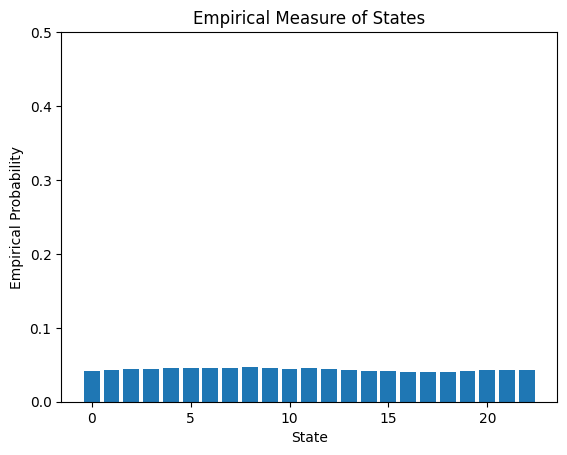


Therefore, the empirical measure of the states is approximately uniform.


In [67]:
# simulating a long trajectory

current_state = np.random.choice(range(23), p=uniform_initial_state)

num_steps = 100000
trajectory = np.zeros((num_steps+1))
trajectory[0] = current_state

empirical_measure = np.zeros(23)

for i in range(num_steps):
    current_state = np.random.choice(range(23), p=T[current_state])
    trajectory[i+1] = current_state
    empirical_measure[current_state] += 1

empirical_measure /= num_steps

# Plotting the bar chart
plt.bar(range(len(empirical_measure)), empirical_measure)
plt.xlabel('State')
plt.ylim(0, 0.5)
plt.ylabel('Empirical Probability')
plt.title('Empirical Measure of States')
plt.show()

print("\nTherefore, the empirical measure of the states is approximately uniform.")

# plt.plot(trajectory)
# plt.xlabel('Steps')
# plt.ylabel('State')
# plt.title('Markov Chain Trajectory')
# plt.show()


![Image](q3-4.png)

In [68]:
uniform_initial_state = np.ones(23) / 23

total_variation = 0.5 * np.sum(np.abs(empirical_measure - uniform_initial_state))

print("\nThe total variation distance between the empirical measure and the uniform initial state is", total_variation)


The total variation distance between the empirical measure and the uniform initial state is 0.0188591304347826


![Image](q3-5.png)
![Image](q3-6.png)

[0.0283 0.0217 0.0165 0.0137 0.0131 0.0149 0.0171 0.0175 0.0207 0.0252
 0.026  0.031  0.0423 0.052  0.064  0.0772 0.0841 0.0869 0.0886 0.0882
 0.0758 0.0554 0.0398]


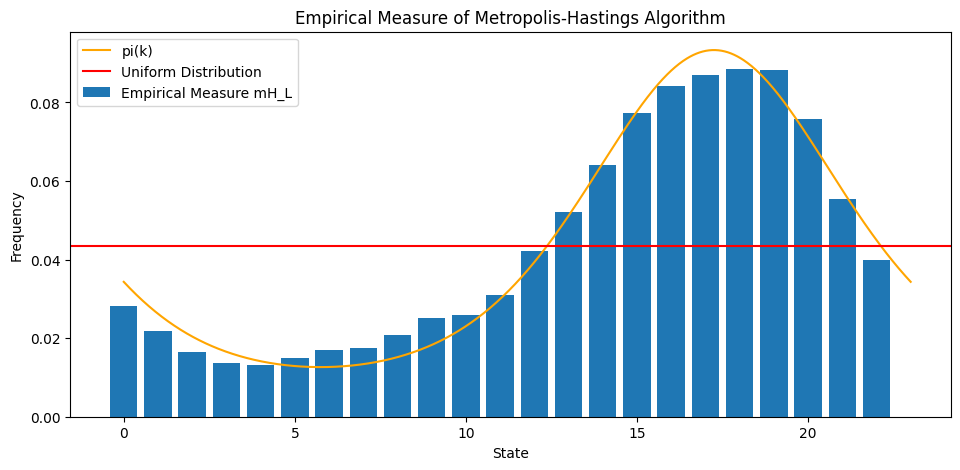

In [17]:
import matplotlib.pyplot as plt
import numpy as np

N = 23  # Number of vertices

# define transition matrix
T = np.zeros((23, 23)) 
# print(T[23])
# print(T)

for i in range(22):
    T[i, i+1] = 1
    T[i+1, i] = 1

T[22, 0] = 1
T[0, 22] = 1

T = T/2

L = 10000  # Length of the Markov chain

# Metropolis-Hastings
# defining H(k)
H = lambda k: np.sin(2 * np.pi * k / N)
# defining pi(k)
pi = lambda k: np.exp(-H(k))
Z = np.sum([pi(k) for k in range(N)])  # summing all values of pi(k) for normalization
pi_normalized = lambda k: pi(k) / Z # normalising pi(k)

# Simulate the Metropolis-Hastings algorithm
Y = np.zeros(L, dtype=int)
Y[0] = np.random.choice(range(N))  # Start from a random state
for i in range(1, L):
    current_state = Y[i-1]
    # Propose a new state using the simple random walk transition matrix
    proposed_state = np.random.choice(range(N), p=T[current_state])
    # Calculate the acceptance probability
    alpha = min(1, pi_normalized(proposed_state) / pi_normalized(current_state))
    # Accept or reject the new state
    Y[i] = proposed_state if np.random.rand() < alpha else current_state

# Calculate the empirical measure for the Metropolis-Hastings algorithm
mH_L = np.array([np.mean(Y == k) for k in range(N)])

# Plotting
plt.figure(figsize=(25, 5))

print(mH_L)

# Plot for Metropolis-Hastings algorithm
plt.subplot(1, 2, 2)

# plot pi(k) as a continuous function
k = np.linspace(0, N, 1000)
plt.plot(k, pi_normalized(k), color = "orange", label='pi(k)')

plt.bar(range(N), mH_L, label='Empirical Measure mH_L')
plt.axhline(1/N, color='red', linestyle='-', label='Uniform Distribution')
plt.title('Empirical Measure of Metropolis-Hastings Algorithm')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.legend()

plt.show()


![Image](q3-7.png)

In [20]:
# calculating the total variation distance

N = 23

total_variation = 0.5 * np.sum( np.abs(mH_L - pi_normalized(np.arange(N))))

print("The total variation distance between the empirical measure and the target distribution is", total_variation)

The total variation distance between the empirical measure and the target distribution is 0.04001645893750866
